   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
--- Logistic Regression ---
Cross-Validation Accuracy: 0.81 ± 0.09
Accuracy: 0.80
Precision: 0.77
Recall: 0.91
F1 Score: 0.83
AUC: 0.87


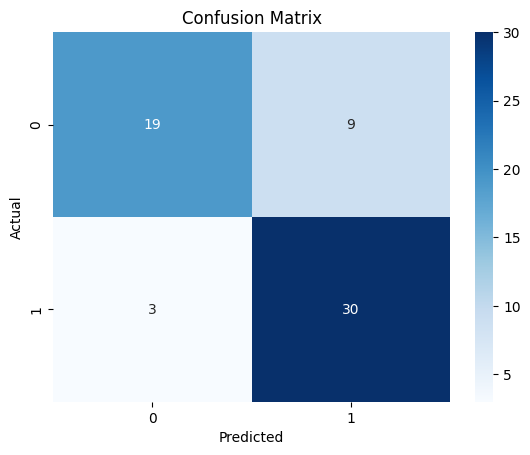

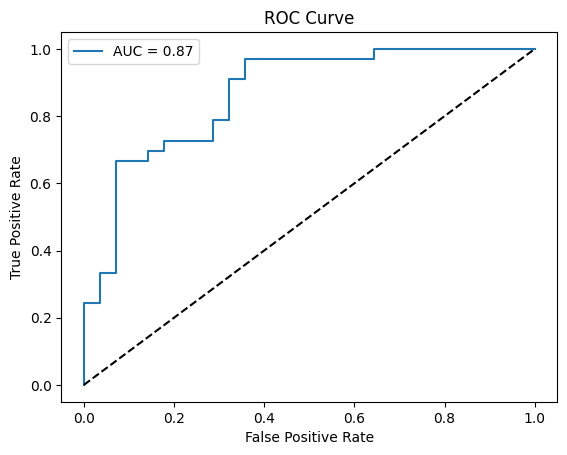



--- k-Nearest Neighbors ---
Cross-Validation Accuracy: 0.67 ± 0.01
Accuracy: 0.59
Precision: 0.62
Recall: 0.61
F1 Score: 0.62
AUC: 0.64


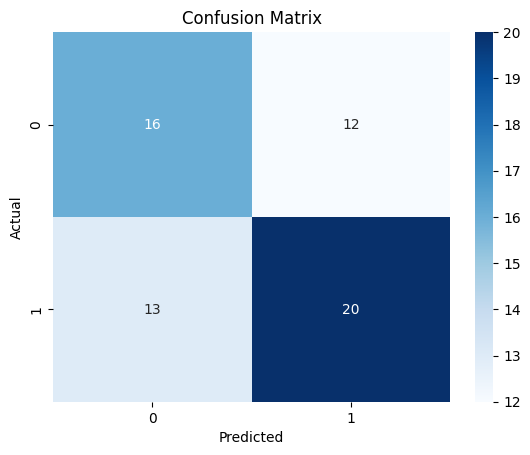

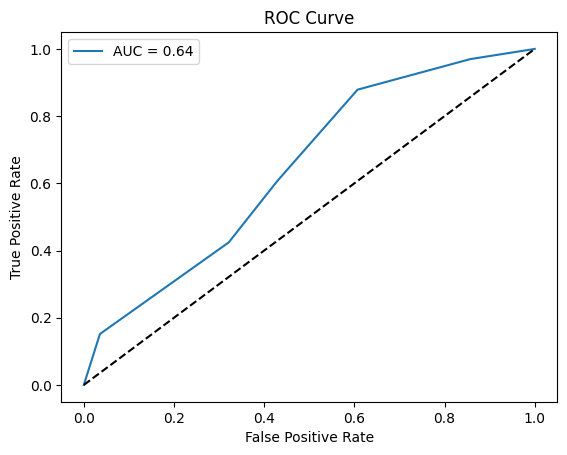



--- Support Vector Machine ---
Cross-Validation Accuracy: 0.64 ± 0.09
Accuracy: 0.66
Precision: 0.65
Recall: 0.79
F1 Score: 0.71
AUC: 0.70


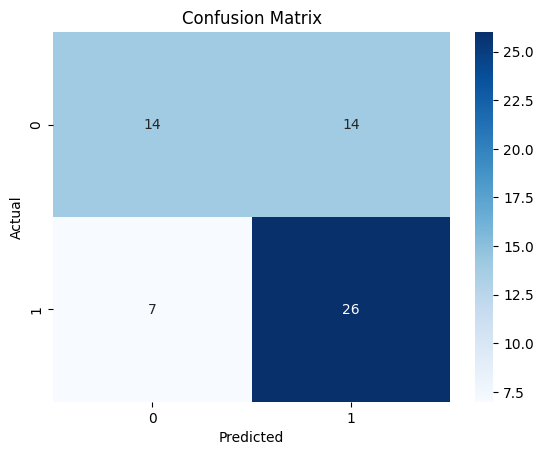

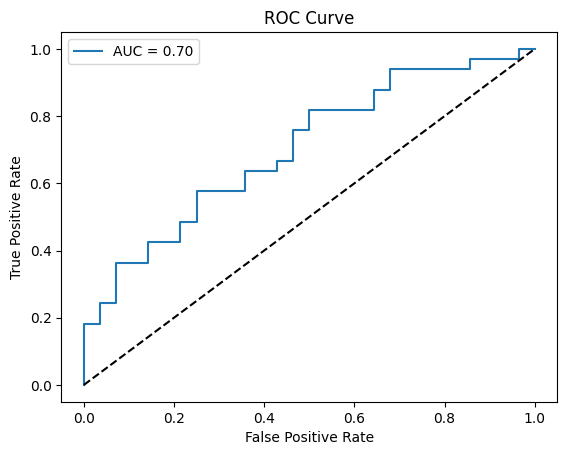



--- Decision Tree ---
Cross-Validation Accuracy: 0.73 ± 0.09
Accuracy: 0.70
Precision: 0.70
Recall: 0.79
F1 Score: 0.74
AUC: 0.70


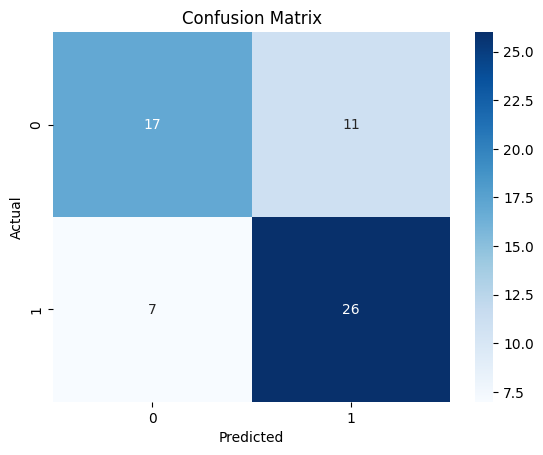

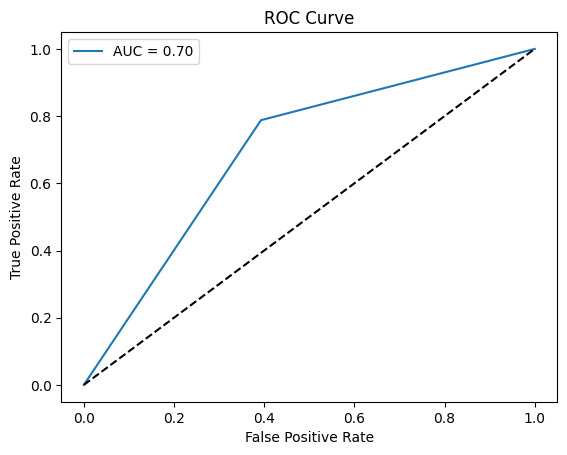



--- Random Forest ---
Cross-Validation Accuracy: 0.80 ± 0.07
Accuracy: 0.84
Precision: 0.78
Recall: 0.97
F1 Score: 0.86
AUC: 0.92


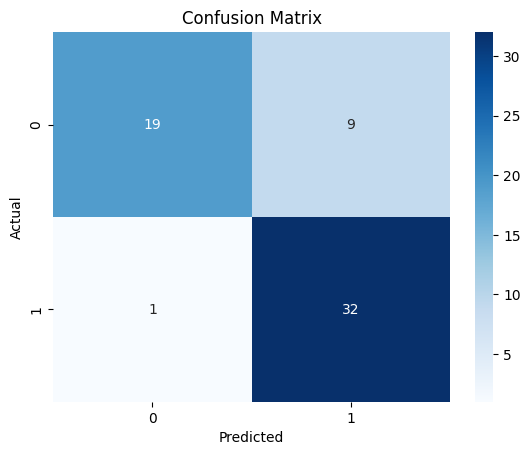

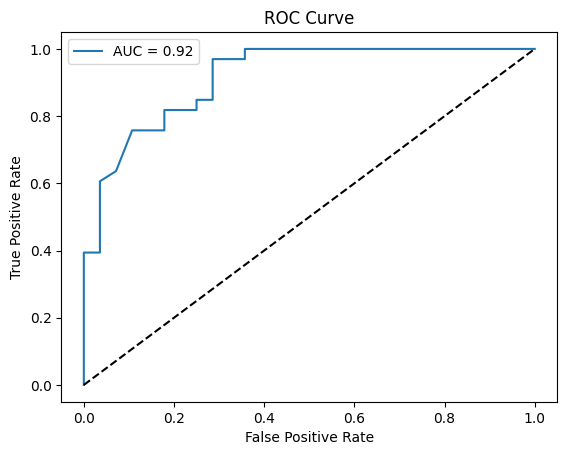

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'heart.csv')

# Display the first few rows of the dataset
print(data.head())

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

selector = SelectKBest(chi2, k=10)
x_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print('Selected Features: ', selected_features)





# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to perform cross-validation and evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Perform 5-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print evaluation metrics
    print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC: {auc:.2f}')
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    print(f'--- {name} ---')
    evaluate_model(model, X_train, y_train, X_test, y_test)
    print('\n')
